In [ ]:
# ارزیابی روی داده تست
sage_test_acc, sage_test_f1 = evaluate(sage_model, data, test_idx)
gcn_test_acc, gcn_test_f1 = evaluate(gcn_model, data, test_idx)

print(f'GraphSAGE - Test Accuracy: {sage_test_acc:.4f}, Test F1: {sage_test_f1:.4f}')
print(f'GCN - Test Accuracy: {gcn_test_acc:.4f}, Test F1: {gcn_test_f1:.4f}')

# رسم نمودارها
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(sage_train_loss, label='GraphSAGE')
plt.plot(gcn_train_loss, label='GCN')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sage_val_acc, label='GraphSAGE Val Acc')
plt.plot(gcn_val_acc, label='GCN Val Acc')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Edge Pr

In [ ]:
from torch_geometric.nn import LinkPrediction
from torch_geometric.utils import negative_sampling

class EdgePredictor(torch.nn.Module):
    def __init__(self, in_channels):
        super().__init__()
        self.lin1 = torch.nn.Linear(2 * in_channels, 128)
        self.lin2 = torch.nn.Linear(128, 1)

    def forward(self, z, edge_index):
        src, dst = edge_index
        x = torch.cat([z[src], z[dst]], dim=1)
        x = F.relu(self.lin1(x))
        return torch.sigmoid(self.lin2(x)).view(-1)

# استفاده از embeddings یادگرفته شده توسط GraphSAGE
edge_model = EdgePredictor(hidden_channels)
optimizer = torch.optim.Adam(edge_model.parameters(), lr=0.01)

# آموزش edge prediction
for epoch in range(50):
    edge_model.train()
    optimizer.zero_grad()

    # تولید embeddings با GraphSAGE
    z = sage_model.conv1(data.x, data.edge_index)
    z = sage_model.conv2(z, data.edge_index)

    # نمونه‌گیری از یالهای مثبت و منفی
    pos_edge_index = data.edge_index
    neg_edge_index = negative_sampling(data.edge_index, num_nodes=data.num_nodes)

    # محاسبه loss
    pos_pred = edge_model(z, pos_edge_index)
    neg_pred = edge_model(z, neg_edge_index)

    pos_loss = -torch.log(pos_pred + 1e-15).mean()
    neg_loss = -torch.log(1 - neg_pred + 1e-15).mean()
    loss = pos_loss + neg_loss

    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')

-----------------------------
# Temp

In [1]:
# نصب numpy سازگار
!pip install numpy==1.24.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 66.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.


In [1]:
# نصب نسخه سازگار PyTorch
!pip install torch==2.0.1 torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

# نصب کتابخانه‌های وابسته دقیقاً مطابق PyG توصیه‌شده برای torch==2.0.1
!pip install pyg-lib==0.2.0 torch-scatter==2.1.1 torch-sparse==0.6.17 torch-cluster==1.6.1 torch-spline-conv==1.2.2 -f https://data.pyg.org/whl/torch-2.0.1+cu118.html

# نصب نسخه صحیح PyG
!pip install torch-geometric==2.3.1

# نصب OGB
!pip install ogb


Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 GB ? eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 9.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 113.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 106.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 114.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 102.0 MB/s eta 0:00:00
INFO: pip is still looki

In [2]:
import torch
from ogb.nodeproppred import PygNodePropPredDataset
from torch_geometric.utils import to_undirected

# بارگذاری دیتاست ogbn-products
dataset = PygNodePropPredDataset(name='ogbn-products')
data = dataset[0]  # فقط یک شیء Data برمی‌گرداند

# یال‌ها را بدون جهت می‌کنیم
data.edge_index = to_undirected(data.edge_index)

# تبدیل برچسب‌ها به [num_nodes]
data.y = data.y.squeeze()

# ماسک‌های آموزش، اعتبارسنجی، آزمون
split_idx = dataset.get_idx_split()
train_idx = split_idx['train']
val_idx = split_idx['valid']
test_idx = split_idx['test']

# بررسی اولیه
print(data)
print(f"# Train samples: {train_idx.shape[0]}")


This will download 1.38GB. Will you proceed? (y/N)
y


Downloaded 1.38 GB: 100%|██████████| 1414/1414 [00:29<00:00, 47.36it/s]


Extracting dataset/products.zip


Processing...


Loading necessary files...
This might take a while.
Processing graphs...


100%|██████████| 1/1 [00:01<00:00,  1.64s/it]


Converting graphs into PyG objects...


100%|██████████| 1/1 [00:00<00:00, 3323.54it/s]


Saving...


Done!


Data(num_nodes=2449029, edge_index=[2, 123718152], x=[2449029, 100], y=[2449029])
# Train samples: 196615


### سریع ساز:

In [3]:
from torch_geometric.loader import NeighborLoader
from torch import tensor

# data = dataset[0]
# data.edge_index = to_undirected(data.edge_index)
# data.y = data.y.squeeze()

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# # فقط همین بخش روی GPU یا CPU منتقل میشه
# data = data.to(device)

train_idx = split_idx['train'].clone().detach()
val_idx = split_idx['valid'].clone().detach()
test_idx = split_idx['test'].clone().detach()

train_loader = NeighborLoader(
    data,
    input_nodes=train_idx,
    num_neighbors=[5, 3],
    batch_size=256,
    shuffle=True
)

val_loader = NeighborLoader(
    data,
    input_nodes=val_idx,
    num_neighbors=[5, 3],
    batch_size=256
)

test_loader = NeighborLoader(
    data,
    input_nodes=test_idx,
    num_neighbors=[5, 3],
    batch_size=256
)


## GCN

In [4]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

# تعریف مدل GCN دو لایه
class GCN(torch.nn.Module):
    def __init__(self, num_features, hidden_channels, num_classes):
        super(GCN, self).__init__()
        # لایه اول: از ویژگی‌ها به فضای پنهان
        self.conv1 = GCNConv(num_features, hidden_channels, bias=False)
        # لایه دوم: از فضای پنهان به کلاس‌ها
        self.conv2 = GCNConv(hidden_channels, num_classes, bias=True)

    # def forward(self, data):
    #     x, edge_index = data.x, data.edge_index
    #     x = self.conv1(x, edge_index)
    #     x = F.relu(x)
    #     x = F.dropout(x, p=0.5, training=self.training)
    #     x = self.conv2(x, edge_index)
    #     return x

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)

        # Dropout کمتر برای سرعت (و جلوگیری از افت یادگیری در دیتای زیاد)
        x = F.dropout(x, p=0.3, training=self.training)
        x = self.conv2(x, edge_index)
        return x


In [6]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
# مقادیر از دیتاست
num_features = data.num_node_features       # =100
num_classes = int(data.y.max().item()) + 1  # =47
hidden_channels = 32                       # قابل تنظیم

#-----------------------------------------------------
save_path = "/content/drive/MyDrive/gcn_node_last.pt"
#-----------------------------------------------------

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# ساخت مدل
model = GCN(num_features, hidden_channels, num_classes).to(device)
data = data.to(device)
train_idx = train_idx.to(device)
val_idx = val_idx.to(device)
test_idx = test_idx.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

#----------------------------------------------------- گوگل کولب
start_epoch = 1
try:
    # اگر فایلی از قبل ذخیره شده بود، از ادامه اجرا کن
    checkpoint = torch.load("gcn_node_last.pt")
    model.load_state_dict(checkpoint['model'])
    optimizer.load_state_dict(checkpoint['optimizer'])
    start_epoch = checkpoint['epoch'] + 1
    print(f"✅ ادامه آموزش از epoch {start_epoch}")
except FileNotFoundError:
    print("⏳ آموزش از اول شروع می‌شود")

#----------------------------------------------------- گوگل درایو

start_epoch = 1
import os
if os.path.exists(save_path):
    checkpoint = torch.load(save_path)
    model.load_state_dict(checkpoint['model'])
    optimizer.load_state_dict(checkpoint['optimizer'])
    start_epoch = checkpoint['epoch'] + 1
    print(f"✅ ادامه آموزش از epoch {start_epoch}")
else:
    print("🟡 فایل مدل قبلی یافت نشد. آموزش از ابتدا آغاز می‌شود.")
#-----------------------------------------------------

# def train():
#     model.train()
#     optimizer.zero_grad()
#     out = model(data)
#     loss = F.cross_entropy(out[train_idx], data.y[train_idx])
#     loss.backward()
#     optimizer.step()
#     return loss.item()
def train():
    model.train()
    total_loss = 0
    for batch in train_loader:
        batch = batch.to(device)
        optimizer.zero_grad()
        out = model(batch.x, batch.edge_index)
        loss = F.cross_entropy(out, batch.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)


# @torch.no_grad()
# def test():
#     model.eval()
#     out = model(data)
#     pred = out.argmax(dim=1)

#     accs = []
#     for idx in [train_idx, val_idx, test_idx]:
#         correct = (pred[idx] == data.y[idx]).sum().item()
#         acc = correct / idx.shape[0]
#         accs.append(acc)
#     return accs
@torch.no_grad()
def test(loader):
    model.eval()
    correct = 0
    total = 0
    for batch in loader:
        batch = batch.to(device)
        out = model(batch.x, batch.edge_index)
        pred = out.argmax(dim=1)
        correct += (pred == batch.y).sum().item()
        total += batch.y.size(0)
    return correct / total



final_epoch = 3  # تعداد کل اپوک‌ها

for epoch in range(start_epoch, final_epoch + 1):
    loss = train()
    train_acc = test(train_loader)
    val_acc = test(val_loader)
    test_acc = test(test_loader)

    print(f"Epoch {epoch:03d}, Loss: {loss:.4f}, "
          f"Train: {train_acc:.4f}, Val: {val_acc:.4f}, Test: {test_acc:.4f}")

    torch.save(model.state_dict(), f"gcn_node_epoch_{epoch:03d}.pt")
    torch.save({
        'epoch': epoch,
        'model': model.state_dict(),
        'optimizer': optimizer.state_dict()
    }, save_path)
    print(f"💾 مدل در Google Drive ذخیره شد: epoch {epoch}")

    # پایان آموزش
    if epoch == final_epoch:
        print(" ")

print("✅ آموزش کامل شد و مدل نهایی آماده است.")

⏳ آموزش از اول شروع می‌شود
✅ ادامه آموزش از epoch 4
✅ آموزش کامل شد و مدل نهایی آماده است.


In [8]:
!pip install -U scikit-learn --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 119.4 MB/s eta 0:00:00


In [ ]:
import torch
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

@torch.no_grad()
def evaluate_gcn_all_metrics(model, loader, name="GCN"):
    model.eval()
    all_preds = []
    all_labels = []

    for batch in loader:
        batch = batch.to(device)
        out = model(batch.x, batch.edge_index)
        pred = out.argmax(dim=1)
        all_preds.append(pred.cpu())
        all_labels.append(batch.y.cpu())

    y_true = torch.cat(all_labels).numpy()
    y_pred = torch.cat(all_preds).numpy()

    # محاسبه معیارها
    acc = accuracy_score(y_true, y_pred)
    f1_macro = f1_score(y_true, y_pred, average='macro')
    f1_micro = f1_score(y_true, y_pred, average='micro')
    precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_true, y_pred, average='macro', zero_division=0)

    print(f"\n📊 ارزیابی نهایی {name}:")
    print(f"Accuracy    : {acc:.4f}")
    print(f"F1-Score(Macro): {f1_macro:.4f}")
    print(f"F1-Score(Micro): {f1_micro:.4f}")
    print(f"Precision   : {precision:.4f}")
    print(f"Recall      : {recall:.4f}")

    return {
        "Accuracy": acc,
        "F1-Macro": f1_macro,
        "F1-Micro": f1_micro,
        "Precision": precision,
        "Recall": recall
    }

# استفاده برای مدل GCN و لودر تست
gcn_metrics = evaluate_gcn_all_metrics(model, test_loader, name="GCN")
evaluate_gcn_all_metrics(model, val_loader, name="GCN-Validation")
evaluate_gcn_all_metrics(model, train_loader, name="GCN-Train")



📊 ارزیابی نهایی GCN:
Accuracy    : 0.5621
F1-Score(Macro): 0.1960
F1-Score(Micro): 0.5621
Precision   : 0.2872
Recall      : 0.1905

📊 ارزیابی نهایی GCN-Validation:
Accuracy    : 0.6560
F1-Score(Macro): 0.2094
F1-Score(Micro): 0.6560
Precision   : 0.3084
Recall      : 0.1943

📊 ارزیابی نهایی GCN-Train:
Accuracy    : 0.6537
F1-Score(Macro): 0.2111
F1-Score(Micro): 0.6537
Precision   : 0.3139
Recall      : 0.1961


{'Accuracy': 0.6537282071309946,
 'F1-Macro': 0.21113551812103565,
 'F1-Micro': 0.6537282071309946,
 'Precision': 0.31394407493096366,
 'Recall': 0.1960981341524284}

In [ ]:
import torch
import torch.nn.functional as F
from torch.nn import Linear, BatchNorm1d
from torch_geometric.nn import GCNConv

class OptimizedGCN(torch.nn.Module):
    def __init__(self, num_features, hidden_channels, num_classes):
        super().__init__()
        self.input_proj = Linear(num_features, 64)
        self.conv1 = GCNConv(64, hidden_channels)
        self.bn1 = BatchNorm1d(hidden_channels)
        self.conv2 = GCNConv(hidden_channels, num_classes)

    def forward(self, x, edge_index):
        x = self.input_proj(x)
        x = self.conv1(x, edge_index)
        x = self.bn1(x)
        x = F.relu(x)
        x = F.dropout(x, p=0.4, training=self.training)
        x = self.conv2(x, edge_index)
        return x


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from sklearn.metrics import accuracy_score
import numpy as np

#  مدل بهینه‌شده GCN
class ImprovedGCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, dropout=0.3):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels, bias=False)
        self.bn1 = nn.BatchNorm1d(hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels, bias=True)
        self.dropout = dropout
        self.act = nn.LeakyReLU(negative_slope=0.1)
        self.reset_parameters()

    def reset_parameters(self):
        self.conv1.reset_parameters()
        self.conv2.reset_parameters()
        self.bn1.reset_parameters()

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = self.bn1(x)
        x = self.act(x)
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.conv2(x, edge_index)
        return x

#  Label Smoothing Loss
class LabelSmoothingCrossEntropy(nn.Module):
    def __init__(self, eps=0.1):
        super().__init__()
        self.eps = eps

    def forward(self, pred, target):
        n_classes = pred.size(1)
        log_preds = F.log_softmax(pred, dim=1)
        target_onehot = F.one_hot(target, num_classes=n_classes).float()
        target_smooth = target_onehot * (1 - self.eps) + self.eps / n_classes
        loss = -(target_smooth * log_preds).sum(dim=1).mean()
        return loss

#  تنظیمات
model = ImprovedGCN(num_features, hidden_channels, num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = LabelSmoothingCrossEntropy(eps=0.1)

#  آموزش با Early Stopping (تا 3 epoch بی‌بهبود → توقف)
best_val_acc = 0
patience = 3
wait = 0
start_epoch = 1

for epoch in range(start_epoch, start_epoch + 10):
    model.train()
    total_loss = 0
    for batch in train_loader:
        batch = batch.to(device)
        optimizer.zero_grad()
        out = model(batch.x, batch.edge_index)
        loss = criterion(out, batch.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    model.eval()
    def eval(loader):
        correct, total = 0, 0
        for batch in loader:
            batch = batch.to(device)
            out = model(batch.x, batch.edge_index)
            pred = out.argmax(dim=1)
            correct += (pred == batch.y).sum().item()
            total += batch.y.size(0)
        return correct / total

    train_acc = eval(train_loader)
    val_acc = eval(val_loader)
    test_acc = eval(test_loader)

    print(f"[Epoch {epoch:02d}] Loss: {total_loss:.4f} | Train: {train_acc:.4f} | Val: {val_acc:.4f} | Test: {test_acc:.4f}")
    torch.save(model.state_dict(), f"Impgcn_node_epoch_{epoch:03d}.pt")

    #  Early Stopping Logic
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        wait = 0
        torch.save(model.state_dict(), "/content/drive/MyDrive/improved_gcn_best.pt")
    else:
        wait += 1
        if wait >= patience:
            print(" آموزش متوقف شد (early stop).")
            break


KeyboardInterrupt: 

### Crach & no run

In [ ]:
# مقادیر از دیتاست
num_features = data.num_node_features       # =100
num_classes = int(data.y.max().item()) + 1  # =47
hidden_channels = 128                       # قابل تنظیم

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# ساخت مدل
model = GCN(num_features, hidden_channels, num_classes).to(device)
data = data.to(device)
train_idx = train_idx.to(device)
val_idx = val_idx.to(device)
test_idx = test_idx.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

# def train():
#     model.train()
#     optimizer.zero_grad()
#     out = model(data)
#     loss = F.cross_entropy(out[train_idx], data.y[train_idx])
#     loss.backward()
#     optimizer.step()
#     return loss.item()
def train():
    model.train()
    total_loss = 0
    for batch in train_loader:
        batch = batch.to(device)
        optimizer.zero_grad()
        out = model(batch.x, batch.edge_index)
        loss = F.cross_entropy(out, batch.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)


# @torch.no_grad()
# def test():
#     model.eval()
#     out = model(data)
#     pred = out.argmax(dim=1)

#     accs = []
#     for idx in [train_idx, val_idx, test_idx]:
#         correct = (pred[idx] == data.y[idx]).sum().item()
#         acc = correct / idx.shape[0]
#         accs.append(acc)
#     return accs
@torch.no_grad()
def test(loader):
    model.eval()
    correct = 0
    total = 0
    for batch in loader:
        batch = batch.to(device)
        out = model(batch.x, batch.edge_index)
        pred = out.argmax(dim=1)
        correct += (pred == batch.y).sum().item()
        total += batch.y.size(0)
    return correct / total


for epoch in range(1, 31):  # فقط 30 دوره برای سرعت اولیه
    loss = train()
    train_acc = test(train_loader)
    val_acc = test(val_loader)
    test_acc = test(test_loader)
    print(f"Epoch {epoch:03d}, Loss: {loss:.4f}, "
          f"Train: {train_acc:.4f}, Val: {val_acc:.4f}, Test: {test_acc:.4f}")



Epoch 001, Loss: 1.4965, Train: 0.6650, Val: 0.6638, Test: 0.5794


## GraphSAGE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [10]:
from torch_geometric.nn import SAGEConv

class GraphSAGE(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GraphSAGE, self).__init__()
        self.conv1 = SAGEConv(in_channels, hidden_channels)
        self.conv2 = SAGEConv(hidden_channels, out_channels)

    # def forward(self, data):
    #     x, edge_index = data.x, data.edge_index
    #     x = self.conv1(x, edge_index)
    #     x = F.relu(x)
    #     x = F.dropout(x, p=0.5, training=self.training)
    #     x = self.conv2(x, edge_index)
    #     return x

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.3, training=self.training)
        x = self.conv2(x, edge_index)
        return x


In [12]:
sage_ckpt_path = "/content/drive/MyDrive/sage_node_last.pt"

sage_model = GraphSAGE(num_features, hidden_channels, num_classes).to(device)
optimizer = torch.optim.Adam(sage_model.parameters(), lr=0.01, weight_decay=5e-4)


start_epoch = 1
import os
if os.path.exists(sage_ckpt_path):
    checkpoint = torch.load(sage_ckpt_path)
    sage_model.load_state_dict(checkpoint['model'])
    optimizer.load_state_dict(checkpoint['optimizer'])
    start_epoch = checkpoint['epoch'] + 1
    print(f"✅ ادامه آموزش GraphSAGE از epoch {start_epoch}")
else:
    print("🟡 آموزش GraphSAGE از ابتدا شروع می‌شود.")


def train_sage():
    sage_model.train()
    total_loss = 0
    for batch in train_loader:
        batch = batch.to(device)
        optimizer.zero_grad()
        out = sage_model(batch.x, batch.edge_index)
        loss = F.cross_entropy(out, batch.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

@torch.no_grad()
def test_sage(loader):
    sage_model.eval()
    correct = total = 0
    for batch in loader:
        batch = batch.to(device)
        out = sage_model(batch.x, batch.edge_index)
        pred = out.argmax(dim=1)
        correct += (pred == batch.y).sum().item()
        total += batch.y.size(0)
    return correct / total



sage_train_acc_list = []
sage_val_acc_list = []
sage_test_acc_list = []


final_epoch = 3  # کل تعداد اپوک‌های مورد نظر

for epoch in range(start_epoch, final_epoch + 1):
    loss = train_sage()
    print("--------")
    train_acc = test_sage(train_loader)
    val_acc = test_sage(val_loader)
    test_acc = test_sage(test_loader)

    print(f"[GraphSAGE] Epoch {epoch:03d}, Loss: {loss:.4f}, "
          f"Train: {train_acc:.4f}, Val: {val_acc:.4f}, Test: {test_acc:.4f}")

    # ذخیره مدل در Google Drive (ادامه‌پذیر)
    torch.save({
        'epoch': epoch,
        'model': sage_model.state_dict(),
        'optimizer': optimizer.state_dict()
    }, sage_ckpt_path)

    # همچنین در مسیر محلی با شماره اپوک
    torch.save(sage_model.state_dict(), f"sage_node_epoch_{epoch:03d}.pt")
    print(f"💾 مدل GraphSAGE ذخیره شد: epoch {epoch}")

    # اگر به آخر اپوک رسید:
    if epoch == final_epoch:
        print("✅ آموزش کامل GraphSAGE به پایان رسید.")

print("Done.")

✅ ادامه آموزش GraphSAGE از epoch 4
Done.


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

@torch.no_grad()
def evaluate_sage_all_metrics(model, loader, name="GraphSAGE"):
    model.eval()
    all_preds = []
    all_labels = []

    for batch in loader:
        batch = batch.to(device)
        out = model(batch.x, batch.edge_index)
        pred = out.argmax(dim=1)
        all_preds.append(pred.cpu())
        all_labels.append(batch.y.cpu())

    y_true = torch.cat(all_labels).numpy()
    y_pred = torch.cat(all_preds).numpy()

    acc = accuracy_score(y_true, y_pred)
    f1_macro = f1_score(y_true, y_pred, average='macro')
    f1_micro = f1_score(y_true, y_pred, average='micro')
    precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_true, y_pred, average='macro', zero_division=0)

    print(f"\n📊 ارزیابی نهایی {name}:")
    print(f"Accuracy      : {acc:.4f}")
    print(f"F1-Score(Macro): {f1_macro:.4f}")
    print(f"F1-Score(Micro): {f1_micro:.4f}")
    print(f"Precision      : {precision:.4f}")
    print(f"Recall         : {recall:.4f}")

    return {
        "Accuracy": acc,
        "F1-Macro": f1_macro,
        "F1-Micro": f1_micro,
        "Precision": precision,
        "Recall": recall
    }

# اجرای ارزیابی روی مدل GraphSAGE و لودر تست
sage_metrics = evaluate_sage_all_metrics(sage_model, test_loader, name="GraphSAGE")
evaluate_gcn_all_metrics(model, val_loader, name="SAGE-Validation")
evaluate_gcn_all_metrics(model, train_loader, name="SAGE-Train")


📊 ارزیابی نهایی GraphSAGE:
Accuracy      : 0.5690
F1-Score(Macro): 0.2060
F1-Score(Micro): 0.5690
Precision      : 0.3068
Recall         : 0.2011

📊 ارزیابی نهایی SAGE-Validation:
Accuracy    : 0.6023
F1-Score(Macro): 0.1812
F1-Score(Micro): 0.6023
Precision   : 0.2893
Recall      : 0.1614

📊 ارزیابی نهایی SAGE-Train:
Accuracy    : 0.6019
F1-Score(Macro): 0.1806
F1-Score(Micro): 0.6019
Precision   : 0.2858
Recall      : 0.1611


{'Accuracy': 0.6019413583103213,
 'F1-Macro': 0.1806062954188998,
 'F1-Micro': 0.6019413583103213,
 'Precision': 0.28575297160296087,
 'Recall': 0.1611162531910095}

# Eval

<ipython-input-14-3224154149>:45: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


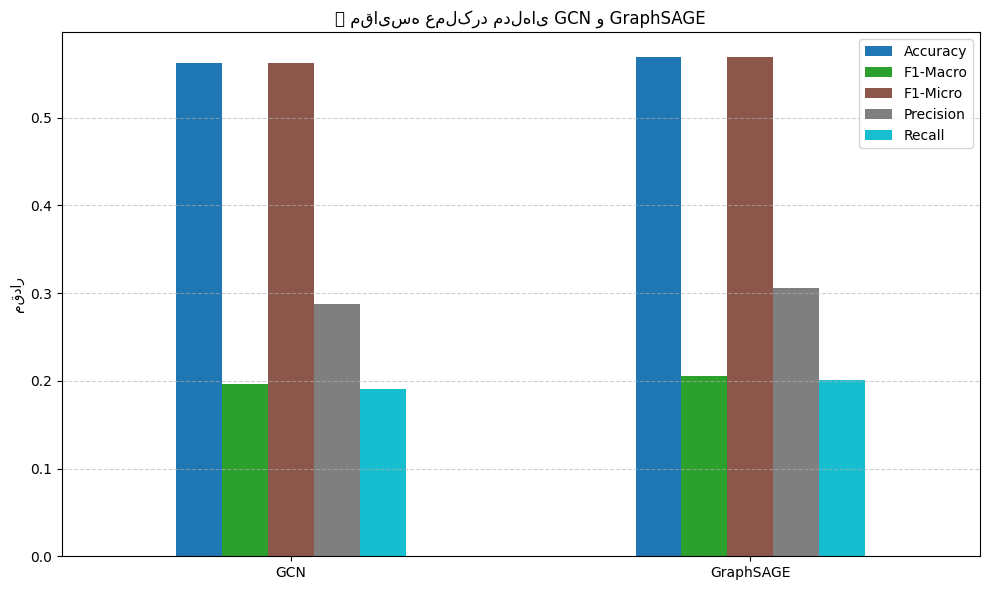

 جدول نهایی مقایسه:
           Accuracy  F1-Macro  F1-Micro  Precision    Recall
GCN        0.562116  0.196033  0.562116   0.287407  0.190544
GraphSAGE  0.568981  0.205922  0.568981   0.306326  0.200950


In [14]:
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt

@torch.no_grad()
def collect_predictions(model, loader):
    model.eval()
    y_true = []
    y_pred = []
    for batch in loader:
        batch = batch.to(device)
        out = model(batch.x, batch.edge_index)
        pred = out.argmax(dim=1)
        y_true.append(batch.y.cpu())
        y_pred.append(pred.cpu())
    return torch.cat(y_true), torch.cat(y_pred)

# گرفتن خروجی واقعی از مدل‌ها
y_true_gcn, y_pred_gcn = collect_predictions(model, test_loader)
y_true_sage, y_pred_sage = collect_predictions(sage_model, test_loader)

def compute_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "F1-Macro": f1_score(y_true, y_pred, average='macro'),
        "F1-Micro": f1_score(y_true, y_pred, average='micro'),
        "Precision": precision_score(y_true, y_pred, average='macro', zero_division=0),
        "Recall": recall_score(y_true, y_pred, average='macro', zero_division=0)
    }

# محاسبه معیارها
gcn_metrics = compute_metrics(y_true_gcn, y_pred_gcn)
sage_metrics = compute_metrics(y_true_sage, y_pred_sage)

# ساخت دیتافریم مقایسه‌ای
df = pd.DataFrame([gcn_metrics, sage_metrics], index=["GCN", "GraphSAGE"])

# رسم نمودار مقایسه‌ای
df.plot(kind='bar', figsize=(10, 6), colormap='tab10')
plt.title("📊 مقایسه عملکرد مدل‌های GCN و GraphSAGE")
plt.ylabel("مقدار")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# نمایش جدول نهایی
print(" جدول نهایی مقایسه:")
print(df)


# Extra Point

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

##  GCN

In [ ]:
# --------------------------- Imports
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.utils import to_undirected, train_test_split_edges, negative_sampling
from torch_geometric.data import Data
from ogb.nodeproppred import PygNodePropPredDataset
from sklearn.metrics import roc_auc_score, average_precision_score
import numpy as np
import os

# --------------------------- Dataset
dataset = PygNodePropPredDataset(name='ogbn-products', root='/tmp/ogb')
split_idx = dataset.get_idx_split()
data = dataset[0]
data.y = data.y.squeeze()
data.edge_index = to_undirected(data.edge_index)
data = train_test_split_edges(data, val_ratio=0.05, test_ratio=0.2)

# --------------------------- Encoder
class GCNEncoder(torch.nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, 64)
        self.conv2 = GCNConv(64, out_channels)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return x

# --------------------------- Decoder
def decode(z, edge_index):
    return (z[edge_index[0]] * z[edge_index[1]]).sum(dim=1)

# --------------------------- Loss (optimized)
def compute_loss(z, pos_edge_index, num_nodes, batch_size=20000):
    pos_score = decode(z, pos_edge_index)
    pos_loss = -F.logsigmoid(pos_score).mean()

    neg_batches = (pos_edge_index.size(1) // batch_size) + 1
    neg_loss_total = 0.0

    for _ in range(neg_batches):
        neg_edge_index = negative_sampling(
            edge_index=pos_edge_index,
            num_nodes=num_nodes,
            num_neg_samples=min(batch_size, pos_edge_index.size(1)),
        )
        neg_score = decode(z, neg_edge_index)
        neg_loss_total += -F.logsigmoid(-neg_score).mean()

    return pos_loss + neg_loss_total / neg_batches

# --------------------------- Setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCNEncoder(data.num_node_features, 64).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
x = data.x.to(device)
train_edge_index = data.train_pos_edge_index.to(device)

# --------------------------- Training
save_path = "/content/drive/MyDrive/edge_gcn_epoch_{epoch:03d}.pt"
for epoch in range(1, 4):
    model.train()
    optimizer.zero_grad()
    z = model(x, train_edge_index)
    loss = compute_loss(z, train_edge_index, x.size(0))
    loss.backward()
    optimizer.step()
    print(f"[EdgePred] Epoch {epoch:02d} | Loss: {loss:.4f}")
    torch.save(model.state_dict(), save_path.format(epoch=epoch))

# --------------------------- Evaluation
@torch.no_grad()
def evaluate(model, x, edge_index, pos_edge_index, neg_edge_index):
    model.eval()
    z = model(x, edge_index)
    pos_score = torch.sigmoid(decode(z, pos_edge_index)).cpu().numpy()
    neg_score = torch.sigmoid(decode(z, neg_edge_index)).cpu().numpy()
    y_true = np.hstack([np.ones(pos_score.shape[0]), np.zeros(neg_score.shape[0])])
    y_scores = np.hstack([pos_score, neg_score])
    auc = roc_auc_score(y_true, y_scores)
    ap = average_precision_score(y_true, y_scores)
    return auc, ap

# Prepare eval edges
full_edge_index = data.edge_index.to(device)
val_pos = data.val_pos_edge_index.to(device)
val_neg = negative_sampling(full_edge_index, x.size(0), num_neg_samples=val_pos.size(1)).to(device)
test_pos = data.test_pos_edge_index.to(device)
test_neg = negative_sampling(full_edge_index, x.size(0), num_neg_samples=test_pos.size(1)).to(device)

# Run evaluation
val_auc, val_ap = evaluate(model, x, full_edge_index, val_pos, val_neg)
test_auc, test_ap = evaluate(model, x, full_edge_index, test_pos, test_neg)
print(f"\n📊 Validation AUC: {val_auc:.4f}, AP: {val_ap:.4f}")
print(f"📊 Test AUC     : {test_auc:.4f}, AP: {test_ap:.4f}")


ogbn-products has been updated.
Will you update the dataset now? (y/N)
y
This will download 1.38GB. Will you proceed? (y/N)
y


Downloaded 1.38 GB: 100%|██████████| 1414/1414 [00:26<00:00, 53.54it/s]


Extracting /tmp/ogb/products.zip


Processing...


Loading necessary files...
This might take a while.


In [ ]:
# 9. Evaluation
@torch.no_grad()
def evaluate_edge_prediction(model, x, edge_index, pos_edge_index, neg_edge_index):
    model.eval()
    z = model(x, edge_index)
    pos_scores = torch.sigmoid(decode(z, pos_edge_index)).cpu().numpy()
    neg_scores = torch.sigmoid(decode(z, neg_edge_index)).cpu().numpy()
    y_true = np.hstack([np.ones(pos_scores.shape[0]), np.zeros(neg_scores.shape[0])])
    y_scores = np.hstack([pos_scores, neg_scores])
    auc = roc_auc_score(y_true, y_scores)
    ap = average_precision_score(y_true, y_scores)
    return auc, ap

full_edge_index = data.edge_index.to(device)
val_pos = data.val_pos_edge_index.to(device)
val_neg = negative_sampling(full_edge_index, x.size(0), num_neg_samples=val_pos.size(1))

test_pos = data.test_pos_edge_index.to(device)
test_neg = negative_sampling(full_edge_index, x.size(0), num_neg_samples=test_pos.size(1))

val_auc, val_ap = evaluate_edge_prediction(model, x, full_edge_index, val_pos, val_neg)
test_auc, test_ap = evaluate_edge_prediction(model, x, full_edge_index, test_pos, test_neg)

print(f"Validation AUC: {val_auc:.4f}, AP: {val_ap:.4f}")
print(f"Test AUC: {test_auc:.4f}, AP: {test_ap:.4f}")

## SAGE

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.utils import to_undirected, train_test_split_edges, negative_sampling
from torch_geometric.nn import SAGEConv
from ogb.nodeproppred import PygNodePropPredDataset
from torch_geometric.data import Data
from sklearn.metrics import roc_auc_score, average_precision_score
import numpy as np
import os

# 1. Load dataset
dataset = PygNodePropPredDataset(name='ogbn-products', root='/tmp/ogb')
graph = dataset[0]
edge_index = torch.tensor(graph[0]['edge_index'], dtype=torch.long)
x = torch.tensor(graph[0]['node_feat'], dtype=torch.float)
y = torch.tensor(graph[1], dtype=torch.long).squeeze()
data = Data(x=x, edge_index=edge_index, y=y)

data.edge_index = to_undirected(data.edge_index)
data = train_test_split_edges(data, val_ratio=0.05, test_ratio=0.2)

# 2. GraphSAGE Encoder
class SAGEEncoder(torch.nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv1 = SAGEConv(in_channels, 64)
        self.conv2 = SAGEConv(64, out_channels)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return x

# 3. Decoder (inner product)
def decode(z, edge_index):
    return (z[edge_index[0]] * z[edge_index[1]]).sum(dim=1)

# 4. Loss with negative sampling
def compute_loss(z, pos_edge_index, num_nodes, batch_size=100000):
    pos_score = decode(z, pos_edge_index)
    pos_loss = -F.logsigmoid(pos_score).mean()

    neg_score_sum = 0
    neg_batches = (pos_edge_index.size(1) // batch_size) + 1

    for _ in range(neg_batches):
        neg_edge_index = negative_sampling(
            edge_index=pos_edge_index,
            num_nodes=num_nodes,
            num_neg_samples=min(batch_size, pos_edge_index.size(1)),
        )
        neg_score = decode(z, neg_edge_index)
        neg_score_sum += -F.logsigmoid(-neg_score).mean()

    return pos_loss + neg_score_sum / neg_batches

# 5. Train setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SAGEEncoder(data.num_node_features, 64).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

x = data.x.to(device)
train_edge_index = data.train_pos_edge_index.to(device)
save_path = "/content/drive/MyDrive/edge_sage_epoch_{epoch:03d}.pt"

# 6. Train loop
for epoch in range(1, 4):
    model.train()
    optimizer.zero_grad()
    z = model(x, train_edge_index)
    loss = compute_loss(z, train_edge_index, x.size(0))
    loss.backward()
    optimizer.step()
    print(f"[EdgePred - SAGE] Epoch {epoch:02d} | Loss: {loss:.4f}")
    torch.save(model.state_dict(), save_path.format(epoch=epoch))


In [ ]:
# 7. Evaluation
@torch.no_grad()
def evaluate_edge_prediction(model, x, edge_index, pos_edge_index, neg_edge_index):
    model.eval()
    z = model(x, edge_index)
    pos_scores = torch.sigmoid(decode(z, pos_edge_index)).cpu().numpy()
    neg_scores = torch.sigmoid(decode(z, neg_edge_index)).cpu().numpy()
    y_true = np.hstack([np.ones(pos_scores.shape[0]), np.zeros(neg_scores.shape[0])])
    y_scores = np.hstack([pos_scores, neg_scores])
    auc = roc_auc_score(y_true, y_scores)
    ap = average_precision_score(y_true, y_scores)
    return auc, ap

full_edge_index = data.edge_index.to(device)
val_pos = data.val_pos_edge_index.to(device)
val_neg = negative_sampling(full_edge_index, x.size(0), num_neg_samples=val_pos.size(1))
test_pos = data.test_pos_edge_index.to(device)
test_neg = negative_sampling(full_edge_index, x.size(0), num_neg_samples=test_pos.size(1))

val_auc, val_ap = evaluate_edge_prediction(model, x, full_edge_index, val_pos, val_neg)
test_auc, test_ap = evaluate_edge_prediction(model, x, full_edge_index, test_pos, test_neg)

print(f"✅ Validation AUC: {val_auc:.4f}, AP: {val_ap:.4f}")
print(f"✅ Test AUC: {test_auc:.4f}, AP: {test_ap:.4f}")

##-----------------------------------------

In [ ]:
!pip install torch==1.12.1+cu113 torchvision==0.13.1+cu113 torchaudio==0.12.1 --extra-index-url https://download.pytorch.org/whl/cu113
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv -f https://data.pyg.org/whl/torch-1.12.1+cu113.html
!pip install ogb

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from ogb.nodeproppred import NodePropPredDataset
from torch_geometric.nn import GCNConv, SAGEConv
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

# 1. آماده‌سازی داده‌ها
dataset = NodePropPredDataset(name='ogbn-products')
split_idx = dataset.get_idx_split()

graph, labels = dataset[0]
edge_index = torch.tensor(graph['edge_index'], dtype=torch.long)
x = torch.tensor(graph['node_feat'], dtype=torch.float)
y = torch.tensor(labels, dtype=torch.long).squeeze()

# ایجاد ماسک‌های آموزشی، اعتبارسنجی و تست
data = Data(x=x, edge_index=edge_index, y=y)
data.train_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
data.val_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
data.test_mask = torch.zeros(data.num_nodes, dtype=torch.bool)

data.train_mask[split_idx["train"]] = True
data.val_mask[split_idx["valid"]] = True
data.test_mask[split_idx["test"]] = True

# 2. تعریف مدل‌ها
class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)
        self.dropout = torch.nn.Dropout(0.5)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

class GraphSAGE(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GraphSAGE, self).__init__()
        self.conv1 = SAGEConv(in_channels, hidden_channels)
        self.conv2 = SAGEConv(hidden_channels, out_channels)
        self.dropout = torch.nn.Dropout(0.5)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# 3. تنظیمات آموزش
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data = data.to(device)

def train_model(model, data, epochs=100):
    model = model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
    train_losses, val_accs, val_f1s = [], [], []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()

        out = model(data)
        loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
        loss.backward()
        optimizer.step()

        # ارزیابی
        model.eval()
        with torch.no_grad():
            out = model(data)
            pred = out.argmax(dim=1)

            # محاسبه دقت و F1 برای اعتبارسنجی
            val_acc = accuracy_score(data.y[data.val_mask].cpu(),
                                   pred[data.val_mask].cpu())
            val_f1 = f1_score(data.y[data.val_mask].cpu(),
                             pred[data.val_mask].cpu(), average='weighted')

        train_losses.append(loss.item())
        val_accs.append(val_acc)
        val_f1s.append(val_f1)

        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, '
                  f'Val Acc: {val_acc:.4f}, Val F1: {val_f1:.4f}')

    return model, train_losses, val_accs, val_f1s

# 4. آموزش مدل‌ها
print("\nآموزش مدل GraphSAGE:")
sage_model, sage_loss, sage_val_acc, sage_val_f1 = train_model(
    GraphSAGE(data.num_features, 256, dataset.num_classes),
    data
)

print("\nآموزش مدل GCN:")
gcn_model, gcn_loss, gcn_val_acc, gcn_val_f1 = train_model(
    GCN(data.num_features, 256, dataset.num_classes),
    data
)

# 5. ارزیابی نهایی
def evaluate_model(model, data):
    model.eval()
    with torch.no_grad():
        out = model(data)
        pred = out.argmax(dim=1)

        train_acc = accuracy_score(data.y[data.train_mask].cpu(),
                                 pred[data.train_mask].cpu())
        val_acc = accuracy_score(data.y[data.val_mask].cpu(),
                               pred[data.val_mask].cpu())
        test_acc = accuracy_score(data.y[data.test_mask].cpu(),
                                pred[data.test_mask].cpu())

        test_f1 = f1_score(data.y[data.test_mask].cpu(),
                         pred[data.test_mask].cpu(), average='weighted')

        return train_acc, val_acc, test_acc, test_f1

print("\nارزیابی GraphSAGE:")
sage_train_acc, sage_val_acc, sage_test_acc, sage_test_f1 = evaluate_model(sage_model, data)
print(f"Train Acc: {sage_train_acc:.4f}, Val Acc: {sage_val_acc:.4f}, "
      f"Test Acc: {sage_test_acc:.4f}, Test F1: {sage_test_f1:.4f}")

print("\nارزیابی GCN:")
gcn_train_acc, gcn_val_acc, gcn_test_acc, gcn_test_f1 = evaluate_model(gcn_model, data)
print(f"Train Acc: {gcn_train_acc:.4f}, Val Acc: {gcn_val_acc:.4f}, "
      f"Test Acc: {gcn_test_acc:.4f}, Test F1: {gcn_test_f1:.4f}")

# 6. مقایسه مدل‌ها
plt.figure(figsize=(15, 10))

# نمودار خطا
plt.subplot(2, 2, 1)
plt.plot(sage_loss, label='GraphSAGE')
plt.plot(gcn_loss, label='GCN')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# نمودار دقت اعتبارسنجی
plt.subplot(2, 2, 2)
plt.plot(sage_val_acc, label='GraphSAGE')
plt.plot(gcn_val_acc, label='GCN')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# مقایسه F1
plt.subplot(2, 2, 3)
models = ['GraphSAGE', 'GCN']
test_f1 = [sage_test_f1, gcn_test_f1]
plt.bar(models, test_f1, color=['blue', 'orange'])
plt.title('Test F1-Score Comparison')
plt.ylabel('F1-Score')

# مقایسه دقت تست
plt.subplot(2, 2, 4)
test_acc = [sage_test_acc, gcn_test_acc]
plt.bar(models, test_acc, color=['blue', 'orange'])
plt.title('Test Accuracy Comparison')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.savefig('results_comparison.png')
plt.show()

# 7. پیاده‌سازی اضافی: Edge Prediction
class EdgePredictor(torch.nn.Module):
    def __init__(self, in_channels):
        super(EdgePredictor, self).__init__()
        self.lin1 = torch.nn.Linear(2 * in_channels, 128)
        self.lin2 = torch.nn.Linear(128, 1)

    def forward(self, z, edge_index):
        src, dst = edge_index
        x = torch.cat([z[src], z[dst]], dim=1)
        x = F.relu(self.lin1(x))
        return torch.sigmoid(self.lin2(x)).squeeze()

def get_embeddings(model, data):
    model.eval()
    with torch.no_grad():
        # استخراج embeddings از لایه اول
        embeddings = model.conv1(data.x, data.edge_index)
        embeddings = F.relu(embeddings)
        return embeddings

print("\nآموزش مدل Edge Prediction با GraphSAGE:")
sage_embeddings = get_embeddings(sage_model, data)
edge_model = EdgePredictor(256).to(device)
optimizer = torch.optim.Adam(edge_model.parameters(), lr=0.01)

# نمونه‌گیری از یالهای منفی
def negative_sampling(edge_index, num_nodes, num_neg_samples=None):
    if num_neg_samples is None:
        num_neg_samples = edge_index.size(1)

    neg_edge_index = torch.randint(0, num_nodes, (2, num_neg_samples), device=device)
    return neg_edge_index

for epoch in range(50):
    edge_model.train()
    optimizer.zero_grad()

    # پیش‌بینی برای یالهای مثبت
    pos_pred = edge_model(sage_embeddings, data.edge_index)
    pos_loss = F.binary_cross_entropy(pos_pred, torch.ones_like(pos_pred))

    # نمونه‌گیری و پیش‌بینی برای یالهای منفی
    neg_edge_index = negative_sampling(data.edge_index, data.num_nodes, num_neg_samples=data.edge_index.size(1))
    neg_pred = edge_model(sage_embeddings, neg_edge_index)
    neg_loss = F.binary_cross_entropy(neg_pred, torch.zeros_like(neg_pred))

    loss = pos_loss + neg_loss
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}/50, Loss: {loss.item():.4f}')

# ارزیابی Edge Prediction
edge_model.eval()
with torch.no_grad():
    pos_pred = edge_model(sage_embeddings, data.edge_index)
    neg_edge_index = negative_sampling(data.edge_index, data.num_nodes, num_neg_samples=100000)
    neg_pred = edge_model(sage_embeddings, neg_edge_index)

    # محاسبه دقت
    pos_acc = (pos_pred > 0.5).float().mean()
    neg_acc = (neg_pred < 0.5).float().mean()
    overall_acc = (pos_acc * pos_pred.size(0) + neg_acc * neg_pred.size(0)) / (pos_pred.size(0) + neg_pred.size(0))

    print(f"\nنتایج Edge Prediction:")
    print(f"Positive Accuracy: {pos_acc.item():.4f}")
    print(f"Negative Accuracy: {neg_acc.item():.4f}")
    print(f"Overall Accuracy: {overall_acc.item():.4f}")

Loading necessary files...
This might take a while.
Processing graphs...


100%|██████████| 1/1 [00:03<00:00,  3.61s/it]


Saving...
